<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Trefethen p28 to p40**.
 
 This notebook showcases the third fifteen problems in Trefethen's classic book _Spectral Methods in MATLAB_. These problems have been ported to Python by Orlando Camargo Rodríguez.  <br><br>
 
 

    
</font>
</div>



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 28 : Eigenmodes of the laplacian on the disk

Note: the "cheb" shown here is the cheb of Rodríguez, which is distinct from that of CPraveen.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Consider the problem of computing the normal modes of oscillation of a circular membrane. That is, the eienvalues of the Laplacian on the unit disk are sought:

$$\Delta u\,=\,-\lambda \,u \hspace{.7 cm} u\,=\,0\:\:\textrm{for}\:r\,=\,1$$

In polar coordinates the equation takes the form

$$u_{rr}\,+\,r^{-1}u_r\,+\,r^{-2}u_{\theta\theta}\,=\,-\lambda^2u$$

The PDE can be discretized by a method used previously in Programs 16 and 23. In $(r,\theta)$-space a grid of $(N_r-1)N_0\,$ points fills the region of the $(r,\theta)$ plane.

The second derivative in $r$ is a matrix of dimension $(N_r-1)\scriptsize{\times}\small{(N_r-1)}$, which is broken up as follows:


$ 
    \hspace{1.7 cm}r>0 \hspace{0.9 cm} r<0\\
    \tilde{D}_r^2 = \left(
    \begin{array}{c|c}
      D_1\hspace{.6 cm} & \hspace{.6 cm}D_2\\
      D_3\hspace{.6 cm} & \hspace{.6 cm}D_4
    \end{array}
    \right)
     \hspace{1 cm}
     \left.
    \begin{array}
      \text{r\,>\,0} & \leftarrow \text{added together}\\
      {r\,<\,0} & \leftarrow \text{discarded}
    \end{array}
    \right.
$

Similarly the first derivative matrix is divided up:

$ 
    \hspace{1.7 cm}r>0 \hspace{0.9 cm} r<0\\
    \tilde{D}_r = \left(
    \begin{array}{c|c}
      E_1\hspace{.6 cm} & \hspace{.6 cm}E_2\\
      E_3\hspace{.6 cm} & \hspace{.6 cm}E_4
    \end{array}
    \right)
     \hspace{1 cm}
     \left.
    \begin{array}
      \text{r\,>\,0} & \leftarrow \text{added together}\\
      {r\,<\,0} & \leftarrow \text{discarded}
    \end{array}
    \right.
$

The second derivative with respect to $\theta$ is the matrix $D_\theta^{(2)}$, of dimension $N_{\theta} \scriptsize{\times}\small{N_{\theta}}$, and this one does not need to be subdivided. All together, our discretization $L$ of the Laplacian in polar coordinates takes the form

$$L\,=\,(D_1\,+\,RE_1)\,\otimes \left(\begin{array}
 \text{I} & 0\\
 0 & I
\end{array}
\right)
\,+\, (D_2+RE_2) \,\otimes\,
\left(\begin{array}
 \text{0} & I\\
 I & 0
\end{array}
\right)
\,+\,R^2\,\otimes \,D_0^{(2)}
$$

where $I$ is the $N_{\theta /2}$ $\scriptsize{\times}\small{N_{\theta /2}}$ identity and $R$ is the diagonal matrix

$R\,=\,\textrm{diag}(r_j^{-1}), \hspace{.7 cm} 1\,\le\,j\,\le(N_r\,-\,1)/2$



</font>
</div>


In [60]:
from numpy import *
from numpy import matlib

def cheb(N):
    # CHEB  compute D = differentiation matrix, x = Chebyshev grid
    D = []
    x = []
    if N==0:
       D = 0.0 
       x = 1.0
    else:
       i = arange(0,N+1)
       x = cos( pi*i/N )
       c = ones(N+1)
       c[ 0] = 2.0
       c[-1] = 2.0
       c = c*( -1 )**( arange(0,N+1) )
       X = matlib.repmat(x,N+1,1).transpose()
       dX = X - X.transpose()
       C = zeros((N+1,N+1))
       for i in range(N+1):
           for j in range(N+1): 
               C[i,j] = c[i]*1.0/c[j]
       D  = C/( dX + eye(N+1) ) # off-diagonal entries
       S = sum( D, axis = 1 )
       D  = D - diag(S) # diagonal entries
    return D,x





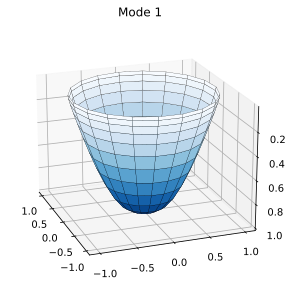

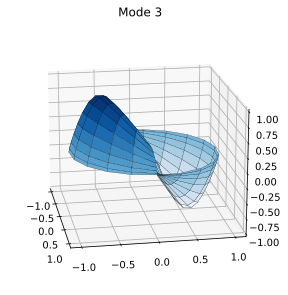

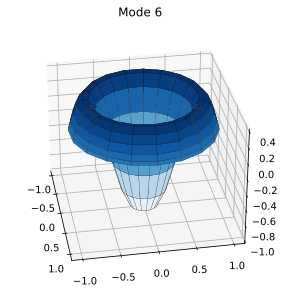

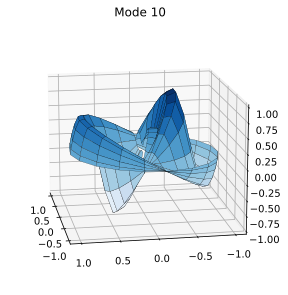

In [61]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# eigenmodes of Laplacian on the disk

# r coordinate, ranging from -1 to 1 (N must be odd):
N = 25
#N2 = (N-1)/2 alternate statement of variable avoids error
N2 = 12
D,r = cheb(N)
DD = matmul(D,D)
D1 = DD[1:N2+1,1:N2+1]
E1 =  D[1:N2+1,1:N2+1]
i = arange(-2,-N2-2,-1)
D2 = DD[1:N2+1,i]
E2 =  D[1:N2+1,i]

# t = theta coordinate, ranging from 0 to 2*pi (M must be even):
M = 20 
dt = 2*pi/M 
t = dt*arange(1,M+1) 
#M2 = alternate statement of variable avoids error
M2 = 10 
c = zeros(1)
c[0] = -pi**2/(3*dt**2) - 1.0/6.0
c = append(c, 0.5*(-1)**arange(2,M+1)/sin( 0.5*dt*arange(1,M) )**2 )
D2t = linalg.toeplitz(c)

# Laplacian in polar coordinates:
R = diag( 1.0/r[1:N2+1] )
Z = zeros((M2,M2))
I = eye(M2)
RR = matmul(R,R)
ZI= hstack((Z,I))
IZ= hstack((I,Z))
ZIIZ = vstack((ZI,IZ))
M1 = D1 + matmul(R,E1)
M2 = D2 + matmul(R,E2)
L = kron( M1, eye(M) ) + kron( M2, ZIIZ ) + kron( RR, D2t )

# Compute eigenmodes:
Lam,V = linalg.eig(-L)
ii = argsort( Lam )
Lam = Lam[ii]
V   = V[:,ii]
index = [0,2,5,9]
Vaux = V[:,index]

modi = [1, 3, 6, 10]

# Plot eigenmodes with nodal lines underneath:
taux = linspace(0,2*pi,M)
rr,tt = meshgrid( r[0:N2+1], taux )
xx = rr*cos( tt )
yy = rr*sin( tt )
uu  = zeros((M,N2+1))
for i in range(4):
    fig = figure(i+1)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Mode '+ str(modi[i]))
    #title( "Mode 1" \n "$\lambda$ =")
    if i == 0:
        ax.view_init(-160,20)
    if i == 1:
        ax.view_init(18,-10)
    if i == 2:
        ax.view_init(30,-10)
    if i == 3:
        ax.view_init(15,-190)
    u = reshape( Vaux[:,i], (N2,M) )
    u = u.transpose()
    uu[:,0:-1] = u
    uu[:,-1]   = u[:,-1]
    uv = reshape(uu,-1)
    uu = uu/linalg.norm(uv,inf)
    #ax.plot_surface(xx, yy, uu, color='b', linewidth=0.9)
    ax.plot_surface(xx, yy, uu, cmap=cm.Blues, edgecolor='black', linewidth=0.2)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 29 : solve Poisson equation on the unit disk




</font>
</div>

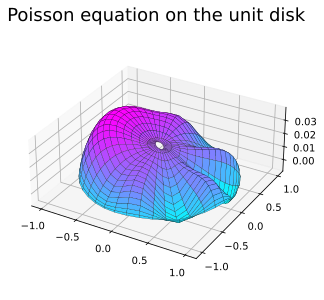

In [62]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# solve Poisson equation on the unit disk

# Laplacian in polar coordinates:
N = 31 
[D,r] = cheb(N) 
#N2 = (N-1)/2 alternate declaration of variable avoids error
N2 = 15
DD = matmul(D,D)
D1 = DD[1:N2+1,1:N2+1]
E1 =  D[1:N2+1,1:N2+1]
i = arange(-2,-N2-2,-1)
D2 = DD[1:N2+1,i]
E2 =  D[1:N2+1,i]

M = 40 
dt = 2*pi/M 
t = dt*arange(1,M+1)
#M2 = M/2 alternate declaration of variable avoids error
M2=20
c = zeros(1)
c[0] = -pi**2/(3*dt**2) - 1.0/6.0
c = append(c, 0.5*(-1)**arange(2,M+1)/sin( 0.5*dt*arange(1,M) )**2 )
D2t = linalg.toeplitz(c)

# Laplacian in polar coordinates:
R = diag( 1.0/r[1:N2+1] )
Z = zeros((M2,M2))
I = eye(M2)
RR = matmul(R,R)
ZI= hstack((Z,I))
IZ= hstack((I,Z))
ZIIZ = vstack((ZI,IZ))
M1 = D1 + matmul(R,E1)
M2 = D2 + matmul(R,E2)
L = kron( M1, eye(M) ) + kron( M2, ZIIZ ) + kron( RR, D2t )

# Right-hand side and solution for u:
rr,tt = meshgrid( r[1:N2+1], t ) 
rrr   = reshape(rr.transpose(),-1)
ttr   = reshape(tt.transpose(),-1) 
f = -rrr**2*sin( 0.5*ttr )**4 + sin( 6*ttr )*cos( 0.5*ttr )**2
u = linalg.solve(L,f) # u = L\f

# Reshape results onto 2D grid and plot them:
u = reshape(u,(N2,M))
u = u.transpose()
uu = zeros((M,N2+1))
uu[:,0:-1] = u
uu[:,-1]   = u[:,-1]
rr,tt = meshgrid( r[0:N2+1],linspace(0,2*pi,M) )
xx = rr*cos( tt )
yy = rr*sin( tt )
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(xx, yy, uu, color='b', linewidth=0.9)
ax.set_box_aspect(aspect = (1,1,0.4))
ax.plot_surface(xx, yy, uu, cmap=cm.cool, edgecolor='black', linewidth=0.2)
title('Poisson equation on the unit disk',fontsize=18)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30 : spectral integration, ODE-Style




</font>
</div>

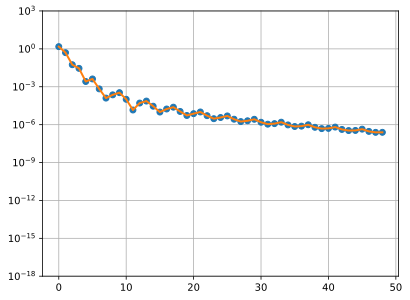

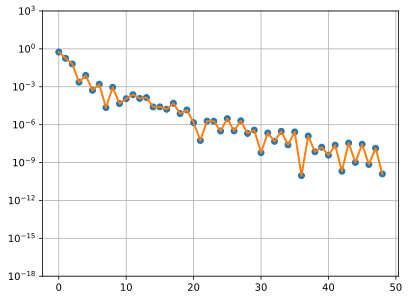

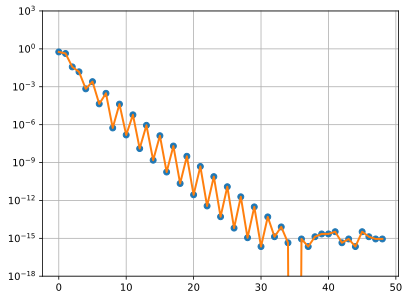

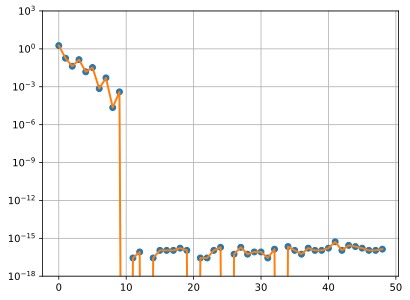

In [63]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    i = arange(0,N)
    D,x = cheb(N) 
    x = x[0:N]
    DN = D[0:N,0:N]
    Di = linalg.inv( DN )
    w = Di[0,:]
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30c : More spectral integration, ODE-style

Note use of the function clencurt in this case, replacing cheb.


</font>
</div>


In [64]:
# CLENCURT  nodes x (Chebyshev points) and weights w
#           for Clenshaw-Curtis quadrature
from numpy import *

def clencurt(N):
  theta = pi*arange(0,N+1)/N 
  x = cos(theta)
  w = zeros(N+1) 
  ii = arange(1,N)
  v = ones(N-1)
  if mod(N,2) == 0:
    w[ 0] = 1.0/(N**2-1) 
    w[-1] = w[0]
    for k in arange(1,N/2): 
        v = v - 2*cos( 2*k*theta[ii] )/( 4*k**2 - 1 )
        v = v - cos( N*theta[ii] )/(N**2 - 1 )
  else:
    w[ 0] = 1.0/N**2
    w[-1] = w[0]
    for k in arange(1,(N-1)/2+1): 
        v = v - 2*cos( 2*k*theta[ii] )/( 4*k**2 - 1 )
  w[ii] = 2*v/N
  return x,w



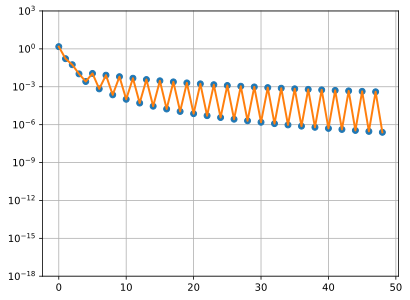

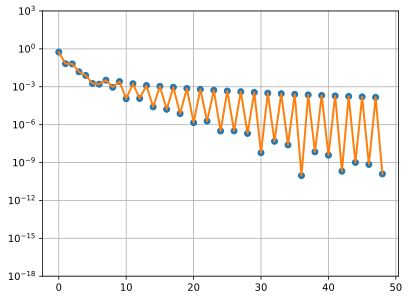

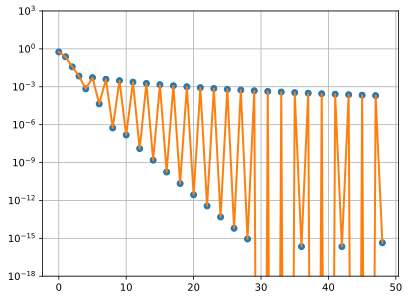

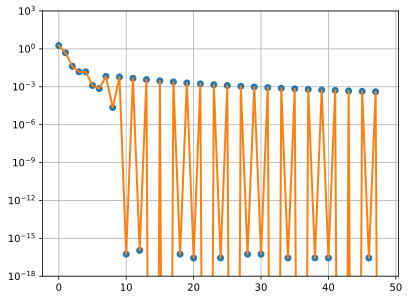

In [65]:
#from clencurt import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    i = arange(0,N)
    x,w = clencurt(N)
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30g : Still more spectral integration, ODE-style

Note the use of the function gauss in this case, replacing clencurt.


</font>
</div>


In [66]:
from numpy import *
from scipy import *
from scipy import linalg
# GAUSS  nodes x (Legendre points) and weights w
#        for Gauss quadrature

def gauss(N):
  beta = 0.5/sqrt( 1.0 - ( 2.0*arange(1,N) )**(-2) )
  T = diag(beta,1) + diag(beta,-1)
  x,V = linalg.eig(T)
  i = argsort( x )
  x = x[i]
  w = 2*V[0,i]**2
  return x,w



C:\Users\gary\AppData\Local\Temp\ipykernel_10616\2165093892.py:19: RuntimeWarning: invalid value encountered in power
  f = exp( -x**(-2) )


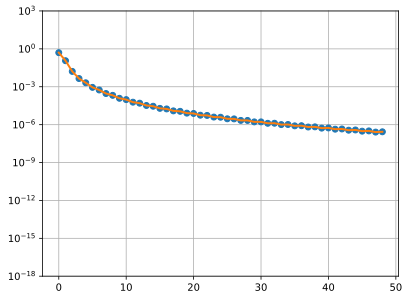

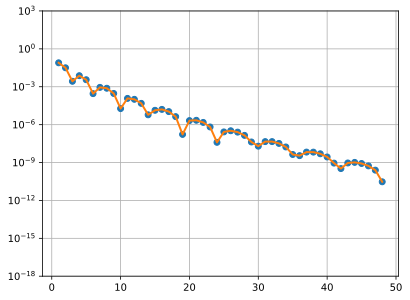

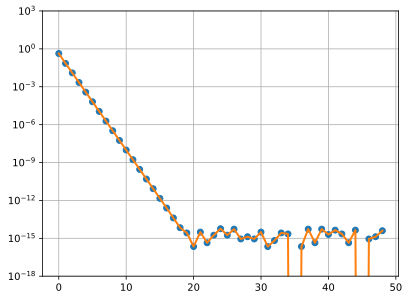

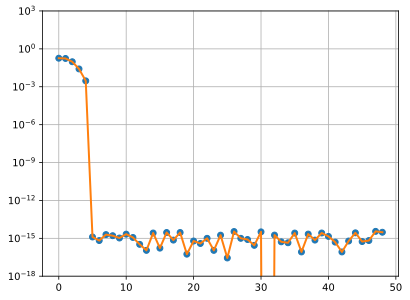

In [67]:
#from gauss import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    x,w = gauss(N)
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: comments relative to Gauss quadrature. Gauss quadrature has genuine advantages of Clenshaw-Curtis quadrature for definite integrals. However, most applications of spectral methods involve the solution of differential equations. For these problems, Gauss quadrature is still relevant if one solves the problem by a Galerkin formulation, but it is less relevant for solutions by collocation, as in this problem set. Some practitioners feel strongly the Galerkin formulations are superior; others feel they require extra effort for little gain. For better or worse, the present problem set concentrates on collocation.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 31 : gamma function via complex integral, trapezoid rule

One of the most familiar of special functions is the gamma function $\Gamma(z)$, the complex generalization of the factorial function, which satisfies $\Gamma(n+1)\,=\,n!$ for each integer $n\,\ge 0$. $\Gamma(z)$ has a pole at each of the nonpositive integers, but $1/\Gamma (z)$ is analytic for all $z$ and is given by a contour integral formula due to Hankel:

$$\frac{1}{\Gamma (z)}\,=\,\frac{1}{2\pi i}\int_C e^tt^{-z}\,dt$$

where $C$ is a contour in the complex plane that begins at $-\infty-0i$ (just below the branch cut of $t^{-z}$ on the negative real axis), winds counterclockwise once around the origin, and ends at $-\infty\,+\,0i$ (just above). Since the integrand decays exponentially as $\textsf{Re}\,t\rightarrow-\infty$, results as accurate as desired can be achieved by replacing $C$ by a bounded contour that begins and ends sufficiently far out on the negative real axis. Specifically, Program 31 takes $C$ to be the circle of radius $r\,=\,16$ centered at $c\,=\,-11$. If $t$ is defined so that $t\,=\,c\,+\,re^{i\theta}$, then $dt\,=\,ire^{i\theta}\,=\,i(t-c)$, and the integral becomes

$$\frac{1}{\Gamma(z)}\,=\, \frac{1}{2\pi}\int_{-\pi}^{\pi}e^t\,t^{-z}(t-c)\,d\theta$$.


</font>
</div>

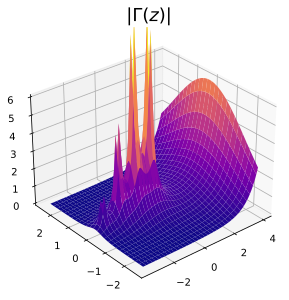

In [68]:
from numpy import * 
from scipy import * 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# gamma function via complex integral, trapezoid rule
N = 70 
i = arange(0.5,N)
theta = -pi + (2*pi/N)*i
c = -11.0 # center of circle of integration
r =  16.0 # radius of circle of integration
x = arange(-3.5,4.1,0.1)
y = arange(-2.5,2.6,0.1)
xx,yy = meshgrid(x,y)
zz = xx + 1j*yy
gaminv = 0
for i in range(N):         
    t = c + r*exp(1j*theta[i])
    gaminv = gaminv + exp(t)*t**(-zz)*(t-c)
gaminv = gaminv/N
gam    = 1.0/gaminv
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, abs(gam), cmap=cm.plasma, linewidth = 0.9)
ax.set_zlim(0,6)
ax.view_init(elev=30, azim=230, roll=0)
title(r'$|\Gamma(z)|$',fontsize=18)
grid(True)
show()




<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: comments relative to Program 30 through 31. The natural spectral method for numerical integration in Chebyshev points is Clenshaw-Curtis quadrature, defined by integrating the polynomial interpolant, and it is spectrally accurate. A higher order of spectral accuracy can be achieved by Gauss quadrature, based on interpolation in Legendre points instead, and this is the basis of many Galerkin spectral methods. The natural spectral integration formula on a periodic interval or a closed contour in the complex plane is the trapezoid rule, and in conjunction with the FFT, this has powerful applications in complex analysis.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 32. Solve the inhomogeneous problem

$$ u_{xx} = e^{4x}, \hspace{1 cm}-1\,<\,x\,<1,\hspace{1 cm}u(-1)=0,\: u(1)=1$$
</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The method of restricting attention to interpolants that satisfy the boundary conditions can be applied here. Since the equation is linear and the second derivative of $x$ is zero, the problem can simply be solved with $u(\pm1)\,=\,0$ and then adding $(x+1)/2$ to the result.


</font>
</div>

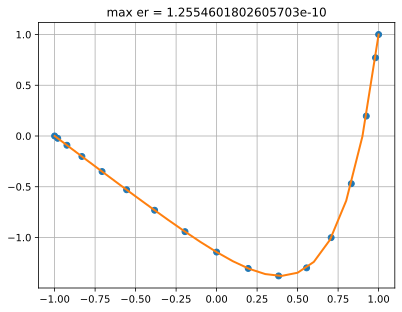

In [69]:
#from cheb import * 
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve u_xx = exp(4x), u(-1)=0, u(1)=1 (compare p13.m)

N = 16
D,x = cheb(N)
DD = matmul(D,D)
D2 = DD[1:N,1:N]
f = exp(4*x[1:N])
u = linalg.solve(D2,f) # u = D2\f;
ux = 0
ux = append(ux,u)
ux = append(ux,0) + 0.5*(x+1)
xx  = arange(-1,1.1,0.1)
uxx = polyval(polyfit(x,ux,N),xx)
exact = (exp(4*xx) - xx*sinh(4) - cosh(4))/16.0 + 0.5*(xx + 1)
figure(1)
plot(x,ux,'o')
plot(xx,uxx,linewidth=2)
thetitle = 'max er = ' + str(linalg.norm(uxx-exact,inf))
title( thetitle )
grid(True)
show()



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 33. Solve the inhomogeneous problem

$$ u_{xx} = e^{4x}, \hspace{1 cm}-1\,<\,x\,<1,\hspace{1 cm}u(-1)= u(1)=0$$
</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The problem is the same as for Program 32, except with a Neumann condition at the left endpoint. This time, it is convenient to apply the method of not restricting the interpolants, but rather adding additional equations to enforce the boundary conditions (Method II). At $x=1$, i.e. grid point $j=0$, a row and a column of the differentiation matrix will be deleted as usual. At $x=-1\,$ and $\,j=N$, on the other hand, a condition involving the first derivative will be imposed. What could be more natural than to use the spectral differentiation matrix $D$ for this purpose? Thus an $N\scriptsize{\times}\small{N}$ (not $(N-1)\scriptsize{\times}\small{(N-1))}$ linear system of equations will end up being solved, in which the first $N$ equations enforce the condition $u_{xx}=e^{4x}$ at the interior grid points and the final equation enforces the condition $u_x=0$ at the leftmost grid point. The matrix of the system of equations will contain $N-1$ rows extracted from $(D_N)^2$ and one taken from $D_N$. In the output from Program 33, it is seen that nine-digit accuracy is achieved with $N=16$).




</font>
</div>

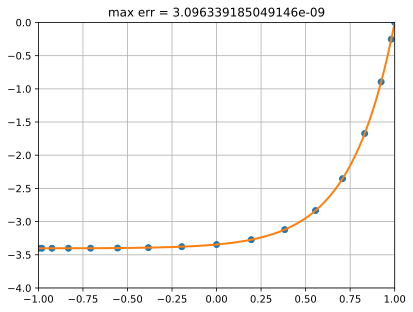

In [70]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve linear BVP u_xx = exp(4x), u'(-1)=u(1)=0

N = 16
D,x = cheb(N)
DD = matmul(D,D)      
DD[-1,:] = D[-1,:] # Neumann condition at x = -1
D2 = DD[1:,1:]                
f = exp( 4*x[1:] )
f[-1] = 0.0
u = linalg.solve(D2,f) # u = D2\[f;0];
ux = 0
ux = append(ux,u)
xx = arange(-1,1.01,0.01)
uxx = polyval(polyfit(x,ux,N),xx)
exact = ( exp(4*xx) - 4*exp(-4)*(xx-1) - exp(4) )/16.0 
maxerr = linalg.norm(uxx-exact,inf)
thetitle = 'max err = ' + str(maxerr)
figure(1)
plot(x,ux,'o')
plot(xx,uxx,linewidth=2)
#plot(xx,exact,linewidth=2)
title( thetitle )
xlim(-1,1)
ylim(-4,0)
grid(True)
show()



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 34. Solve the nonlinear _reaction-diffusion_ equation:

$$u_t\,=\,\epsilon u_{xx}\,+\,u\,-\,u^3$$

where $\epsilon$ is a parameter.
</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The equation displayed above is known as the Allen-Cahn, or _bistable equation_. The equation has three constant steady states, $\:u=-1,\hspace{.3 cm}u=0,\hspace{.3 cm}$ and $\:u=1$. The middle state is unstable, but the states $u=\pm1$ are attracting, and solutions tend to exhibit flat areas close to these values separated by interfaces that may coalesce or vanish on a long time scale, a phenomenon known as _metastability_. In the output to Program 34, metastability up to $t\approx45$ is seen, followed by rapid transition to a solution with just one interface.




</font>
</div>

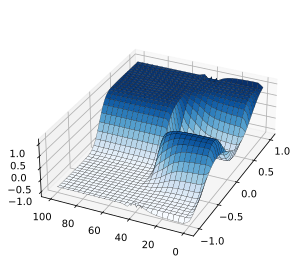

In [71]:
#from cheb  import *
%config InlineBackend.figure_formats = ['svg']
from numpy import *
from scipy import *
from scipy import linalg 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# Allen-Cahn eq. u_t = eps*u_xx+u-u^3, u(-1)=-1, u(1)=1

# Differentiation matrix and initial data:
N = 20 
[D,x] = cheb(N) 
D2 = matmul(D,D) # use full-size matrix
D2[:, 0] = 0.0 # for convenience
D2[:,-1] = 0.0
eps = 0.01 
dt = min([.01,50*N**(-4)/eps])
t = 0 
v = 0.53*x + 0.47*sin( -1.5*pi*x )

# Solve PDE by Euler formula and plot results:
tmax =  100 
tplot = 2.0 
nplots  = int(tmax/tplot)
plotgap = int(tplot/dt  ) 
dt = tplot/plotgap
xx = arange(-1,1.025,0.025)
vv = polyval(polyfit(x,v,N),xx)
plotdata = vstack((vv,zeros((nplots,xx.size))))
tdata = t
for i in range(nplots):
    for n in range(plotgap):
      t = t + dt
      v = v + dt*( eps*D2.dot(v-x) + v - v**3 ) # Euler
    vv = polyval(polyfit(x,v,N),xx)
    plotdata[i+1,:] = vv 
    tdata = append(tdata, t)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=205, roll=0)
#ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax.set_box_aspect(aspect = (1.3,1,0.4))
XX,YY = meshgrid(xx,tdata)
ax.plot_surface(XX, YY, plotdata, cmap=cm.Blues, edgecolor='black', linewidth = 0.2)

show()



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 35. Solve the nonlinear _reaction-diffusion_ equation again (Program 34), but this
time observe the boundary conditions 

$$u(-1,t)\,=\,0, \hspace{.3 cm} u(1,t)\,=\,1\,+\,\textrm{sin}^2(t/5)$$

</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Here again it becomes convenient to apply the method of not restricting the interpolants, but rather adding additional equations to enforce the boundary conditions ("Method II"). Since $1\,+\,\textrm{sin}^2(t/5)\,>\,1\,$ for most $t$, the boundary condition effectively pumps amplitude into the system, and the effect is that the location of the final interface is moved from $x=0$ to $x\approx-0.4$. Notice also that the transients vanish earlier, at $t\approx30$ instead of $t\approx45$.

</font>
</div>

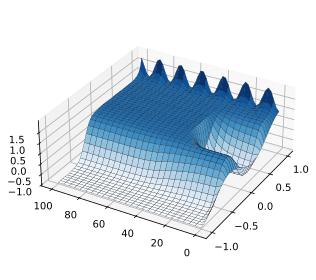

In [72]:
#from cheb  import *
from numpy import *
from scipy import *
from scipy import linalg 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# Allen-Cahn eq. with boundary condition
# imposed explicitly ("method (II)")

# Differentiation matrix and initial data:
N = 20 
[D,x] = cheb(N) 
D2 = matmul(D,D) # use full-size matrix
eps = 0.01 
dt = min([.01,50*N**(-4)/eps])
t = 0 
v = 0.53*x + 0.47*sin( -1.5*pi*x )

# Solve PDE by Euler formula and plot results:
tmax =  100 
tplot = 2.0 
nplots  = int(tmax/tplot)
plotgap = int(tplot/dt  ) 
dt = tplot/plotgap
xx = arange(-1,1.025,0.025)
vv = polyval(polyfit(x,v,N),xx)
plotdata = vstack((vv,zeros((nplots,xx.size))))
tdata = t
for i in range(nplots):
    for n in range(plotgap):
      t = t + dt
      v = v + dt*( eps*D2.dot(v-x) + v - v**3 ) # Euler
      v[ 0] =  1.0 + sin( t/5.0 )**2
      v[-1] = -1.0
    vv = polyval(polyfit(x,v,N),xx)
    plotdata[i+1,:] = vv 
    tdata = append(tdata, t)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=-150, roll=0)
ax.set_box_aspect(aspect = (1,1,0.4))
XX,YY = meshgrid(xx,tdata)
ax.plot_surface(XX, YY, plotdata, cmap=cm.Blues, edgecolor='black', linewidth = 0.2)
show()



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 36. Solve the time-independent problem, the Laplace equation

$$u_{xx}\,+\,u_{yy}\,=\,0\hspace{1 cm}-1<x,y<1$$

subject to the boundary conditions

\begin{equation}
  u(x,y)=\begin{cases}
    \textrm{sin}^4(\pi x), & \hspace{.2 cm} y=1\:\textrm{and}\:-1<x<0,\\
    \frac{1}{5}\textrm{sin}(3\pi y), & \hspace{.2 cm} x=1,\\
    0, &\hspace{.2 cm} \textrm{otherwise}
  \end{cases}
\end{equation}


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Method II is used to enforce the boundary conditions. The mathematics is straightforward but care must be taken with the bookkeeping.

</font>
</div>

C:\Users\gary\AppData\Local\Temp\ipykernel_10616\3177361717.py:47: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interpolate.interp2d(x,y,uu,'cubic')
C:\Users\gary\AppData\Local\Temp\ipykernel_10616\3177361717.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
       

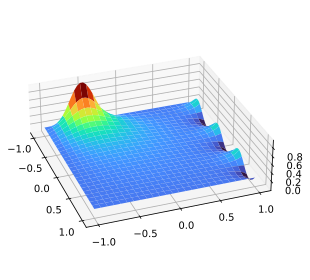

In [73]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import interpolate
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# Laplace eq. on [-1,1]x[-1,1] with nonzero BCs

# Set up grid and 2D Laplacian, boundary points included:
N = 24 
D,x = cheb(N) 
y = x
xx,yy = meshgrid(x,y)
xxr = reshape(xx.transpose(),-1)
yyr = reshape(yy.transpose(),-1)
D2 = matmul(D,D)
I = eye(N+1)
L = kron(I,D2) + kron(D2,I)

# Impose boundary conditions by replacing appropriate rows of L:
bw = where( ( abs(xxr) == 1 )|( abs(yyr) == 1 ) )
b = bw[0]
n = b.size
L[b,:] = zeros((4*N,(N+1)**2))
for i in range(n):
    for j in range(n):
        if i == j:
           L[b[i],b[j]] = 1.0
        else:
           L[b[i],b[j]] = 0.0

yyri = zeros(n); i = where( yyr[b] == 1 ); yyri[ i[0] ] = 1.0
xxri = zeros(n); i = where( xxr[b] <  0 ); xxri[ i[0] ] = xxr[i[0]]
XXri = zeros(n); i = where( xxr[b] == 1 ); XXri[ i[0] ] = 1.0
rhs = zeros((N+1)**2)
rhs[b] = yyri*xxri*sin( pi*xxr[b] )**4 + 0.2*XXri*sin( 3*pi*yyr[b] )

# Solve Laplace equation, reshape to 2D, and plot:
u = linalg.solve(L,rhs) # u = L\rhs; 
uu = reshape(u,(N+1,N+1))
x3 = arange(-1,1.04,0.04)
y3 = arange(-1,1.04,0.04)
[xxx,yyy] = meshgrid( x3 , y3 )
interpolator = interpolate.interp2d(x,y,uu,'cubic')
uuu = interpolator(x3,y3)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=340, roll=0)
ax.plot_surface(-xxx, yyy, uuu, cmap=cm.turbo, linewidth = 0.9)
ax.set_box_aspect(aspect = (1,1,0.3))
show()
#  uuu = interp2(xx,yy,uu,xxx,yyy,'cubic');
#   subplot('position',[.1 .4 .8 .5])
#  mesh(xxx,yyy,uuu), colormap(1e-6*[1 1 1]);
#  axis([-1 1 -1 1 -.2 1]), view(-20,45)
#  text(0,.8,.4,sprintf('u(0,0) = #12.10f',uu(N/2+1,N/2+1)))






















<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: In order to get the same handedness in the plot as shown in the text, the $x$ coordinate requires sign reversal.

</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 37. Solve the problem

$$u_{tt}\,=\,u_{xx}\,+\,u_{yy}\hspace{1 cm}-3<x<3,\hspace{.3 cm}-1<y<1$$

subject to the boundary conditions

\begin{equation}
  u(x,y)=\begin{cases}
    \textrm{sin}^4(\pi x), & \hspace{.2 cm} y=1\:\textrm{and}\:-1<x<0,\\
    \frac{1}{5}\textrm{sin}(3\pi y), & \hspace{.2 cm} x=1,\\
    0, &\hspace{.2 cm} \textrm{otherwise}
  \end{cases}
\end{equation}


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Another example of the use of Neumann boundary conditions. Following Program 20, the second-order wave equation in two dimensions is considered, now on a rectangular domain. What is new are Neumann boundary conditions along the sides of the "wave tank" and periodic boundary conditions at the ends:

$$u_y(x,\pm1,\,t)\,=\,0, \hspace{1 cm}u(-3,y,t)\,=\,u(3,y,t)$$

</font>
</div>

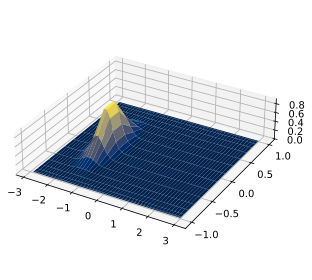

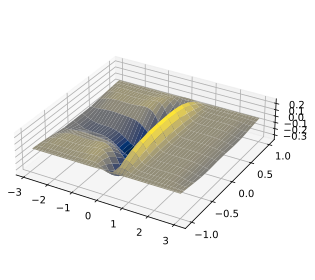

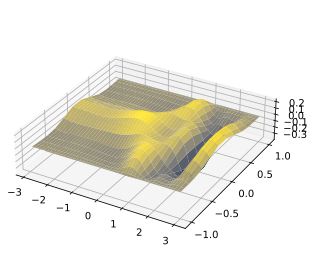

In [74]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# "wave tank" with Neumann BCs for |y|=1

# x variable in [-A,A], Fourier:
A  = 3.0
Nx = 50
dx = 2*A/Nx
x = -A + dx*arange(1,Nx+1)
c  = -1.0/(3.0*(dx/A)**2) - 1.0/6.0
c2 =  0.5*(-1)**( arange(2,Nx+1) )/sin( (pi*dx/A)*( 0.5*arange(1,Nx) ) )**2
c = append(c, c2)
D2x = (pi/A)**2*linalg.toeplitz(c)

# y variable in [-1,1], Chebyshev:
Ny = 15 
Dy,y = cheb(Ny) 
D2y = matmul(Dy,Dy)
DY = zeros((2,2))
DY[0,0] = Dy[ 0, 0]
DY[0,1] = Dy[ 0,-1]
DY[1,0] = Dy[-1, 0]
DY[1,1] = Dy[-1,-1]
FY = zeros((2,Ny-1))
FY[0,:] = Dy[ 0,1:Ny]
FY[1,:] = Dy[-1,1:Ny]
BC = linalg.solve(DY,FY)

# Grid and initial data:
xx,yy = meshgrid(x,y)
vv = exp(- 8*( ( xx + 1.5)**2 + yy**2 ) )
dt = 5.0/( Nx + Ny**2 ) 
vvold = exp( -8*( ( xx + dt + 1.5 )**2 + yy**2 ) )

# Time-stepping by leap frog formula:
plotgap = int( 2.0/dt ) 
dt = 2.0/plotgap
j = 0
for n in range( 2*plotgap+1 ):
    t = n*dt
    if mod( n + .5, plotgap ) < 1:
       j = j + 1
       fig = figure(j)
       ax = fig.add_subplot(111, projection='3d')
       ax.plot_surface(xx, yy, vv, cmap=cm.cividis, linewidth = 0.9)
       ax.set_box_aspect(aspect = (1,1,0.25))
    vvnew = 2*vv - vvold + dt**2*( matmul(vv,D2x) + matmul(D2y,vv) )
    vvold = vv 
    vv    = vvnew
    # Neumann BCs for |y| = 1
    prod = matmul(BC,vv[1:Ny,:])
    vv[ 0,:] = prod[0,:]
    vv[-1,:] = prod[1,:]
show()


















<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: comments relative to Program 32 through 37. Simple boundary conditions for spectral collocation methods can be imposed by restricting attention to interpolants that satisfy the boundary conditions. For more complicated problems, it is more convenient to permit arbitrary interpolants but add additional equations to the discrete problem to enforce the boundary conditions.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 38. Solve the problem

$$u_{xxxx}(x)\,=\,e^x,\hspace{.8 cm}u(\pm1)\,=\,u_x(\pm1)\,=\,0,\hspace{.8 cm}-1<x<1$$


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Physically, $u(x)$ might represent the transverse displacement of a beam subject to a force $f(x)$. The conditions at $x=\pm1$ are known as _clamped boundary conditions_, corresponding to holding both the position and the slope of a beam fixed at the ends.

Set $w_j \,=\, p_{xxxx}(x_j)$. The quantity $w$ can be obtained as a by-product of the usual Chebyshev differentiation matrix $D_N$ if

$$p(x)\,=\,(1-x^2)q(x).$$

At the matrix level, let $\tilde{D}_N^2, \tilde{D}_N^3,\:$ and $\:\tilde{D_N^4}\,$ be the matrices obtained by taking the indicated powers of $D_N$ and stripping away the first and last rows and columns. Then the spectral biharmonic operator becomes

$$L\,=\,\left [ \textrm{diag}(1-x_j^2)\tilde{D}_N^4 \,-\,8\:\textrm{diag}(x_j)\tilde{D}_N^3\,-\,12\tilde{D}_N^2 \right]\:\scriptsize{\times}\:\small{\textrm{diag}(1/(\textrm{i}-x_j^2))}$$

where $j$ runs from 1 to $N-1$. Solving our original problem spectrally is now just a matter of solving a linear system of equations for $v$,

$$Lv\,=\,f$$

where $f\,=\,(f_1,\ldots , f_{N-1})^T$.


</font>
</div>

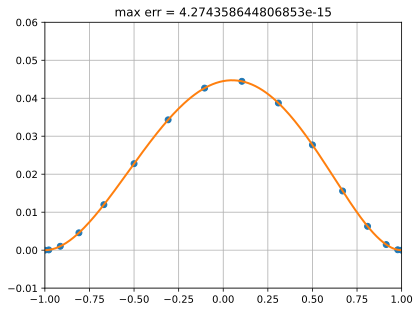

In [75]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve u_xxxx = exp(x), u(-1)=u(1)=u'(-1)=u'(1)=0

# Construct discrete biharmonic operator:
N = 15 
D,x = cheb(N)
c = 0
c = append(c, 1.0/( 1 - x[1:N]**2 ) )
c = append( c , 0 )
S = diag( c )
D2 = matmul(D ,D )
D3 = matmul(D2,D )
D4 = matmul(D2,D2)
C1 = diag( 1.0 - x**2 )
C2 = diag( x )
M = matmul(C1,D4) - matmul(8*C2,D3) - 12*D2
D4 = matmul(M,S)
Div = D4[1:N,1:N]

# Solve boundary-value problem and plot result:
f = exp( x[1:N] ) 
u = linalg.solve(Div,f) # u = D4\f; 
ux = 0
ux = append(ux,u)
ux = append(ux,0)
xx = arange(-1,1.01,0.01)
uu = (1 - xx**2)*polyval(polyfit(x,matmul(S,ux),N),xx)

# Determine exact solution and print maximum error:
A = array([[1, -1, 1, -1],[0, 1, -2, 3],[1, 1, 1, 1],[0, 1, 2, 3]])
V = vander(xx)
V2 = V[:,-1:-5:-1]
e = array([-1, -1, 1, 1])
e = exp(e)
c = linalg.solve(A,e) # c = A\exp([-1 -1 1 1]'); 
exact = exp(xx) - matmul(V2,c)
maxerr = linalg.norm(uu-exact,inf)
thetitle = 'max err = ' + str(maxerr)

figure(1)
plot(x,ux,'o')
plot(xx,uu,linewidth=2)
title( thetitle )
xlim(-1,1)
ylim(-0.01,0.06)
grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 38. Solution of the one-dimensional biharmonic equation. Fourteen digits of accuracy are produced with $N\,=\,15$.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Program 39. Solve the problem

$$\Delta ^2 u\,=\,\lambda u,\hspace{.7 cm}-1<x,y<1,\hspace{.7 cm}u\,=\,u_n\,=\,0\:\textrm{on the boundary}$$

where $u_n$ denotes the normal derivative.

</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The given problem is an example of a clampled plate problem on the unit square.


</font>
</div>

C:\Users\gary\AppData\Local\Temp\ipykernel_10616\375450923.py:48: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interpolate.interp2d(x,x,uu,'cubic')
C:\Users\gary\AppData\Local\Temp\ipykernel_10616\375450923.py:49: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        s

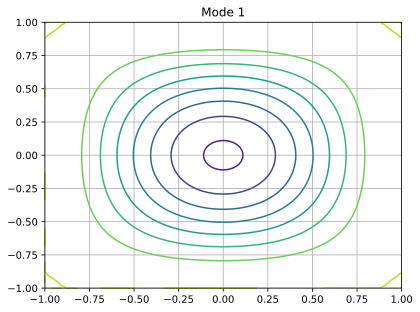

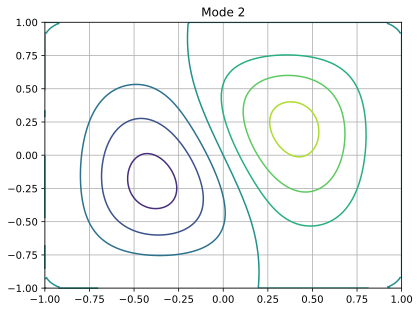

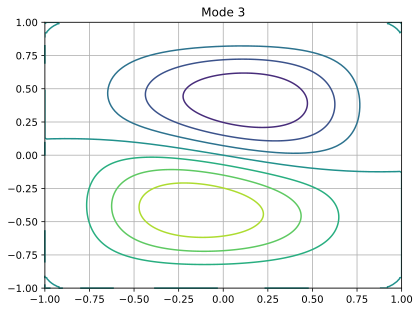

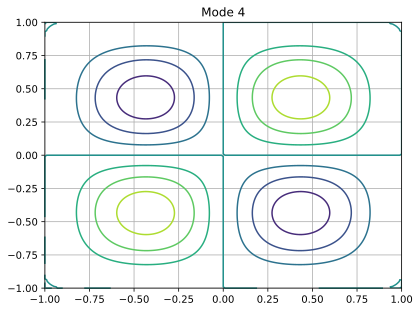

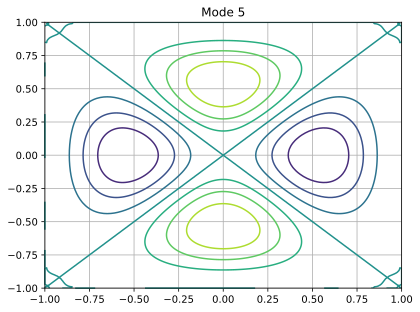

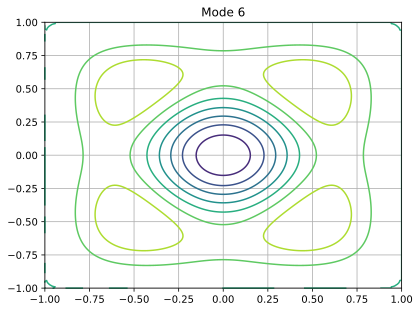

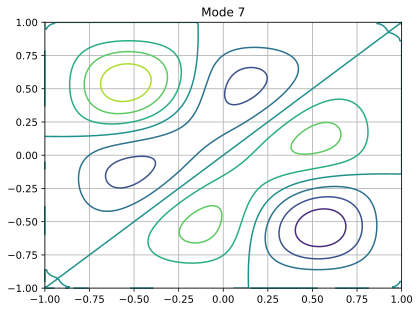

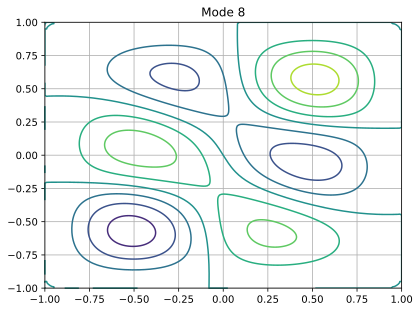

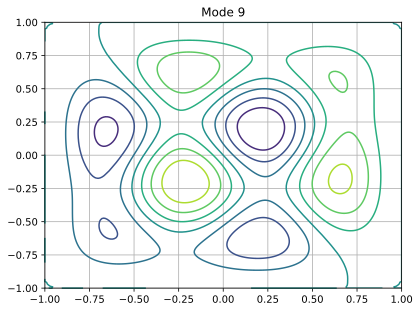

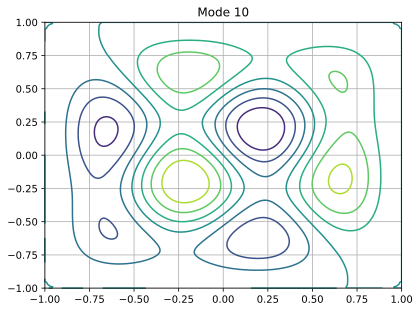

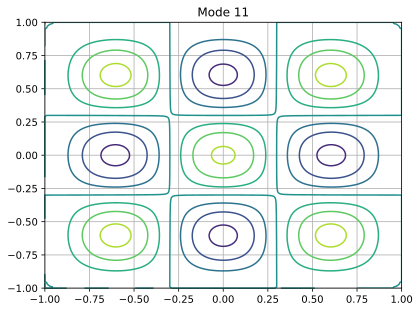

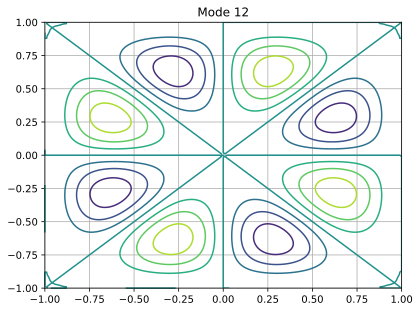

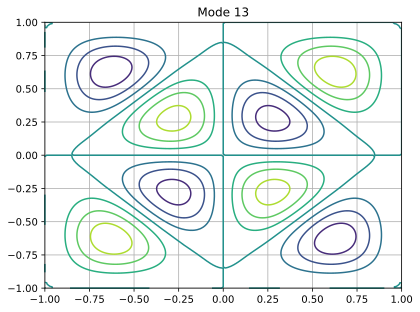

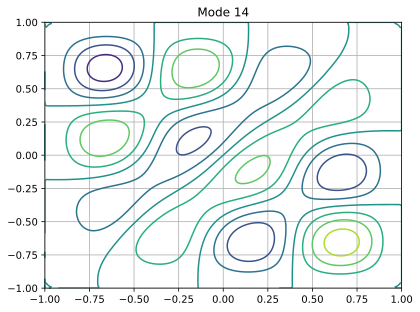

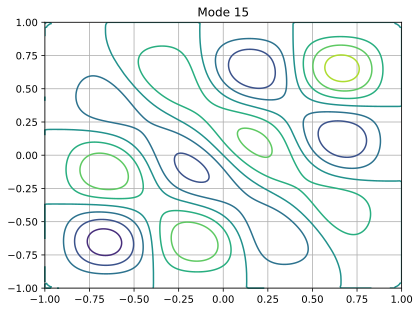

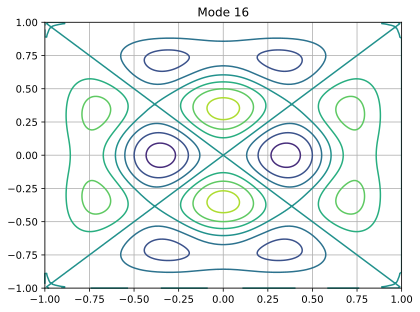

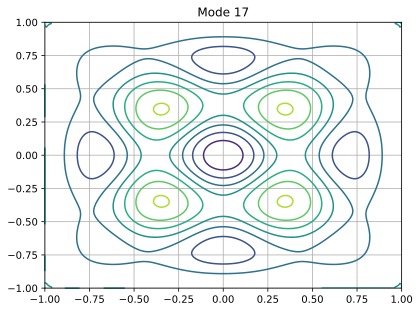

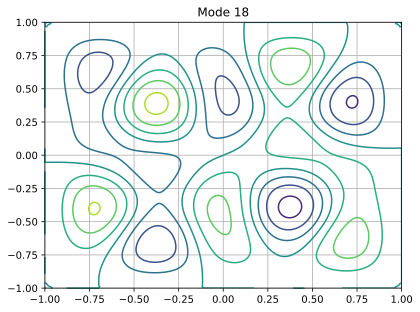

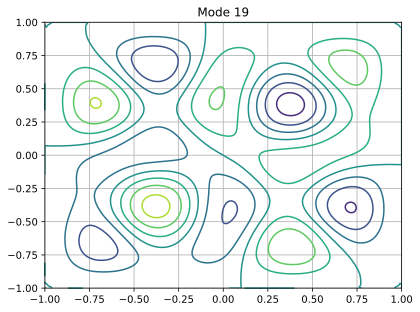

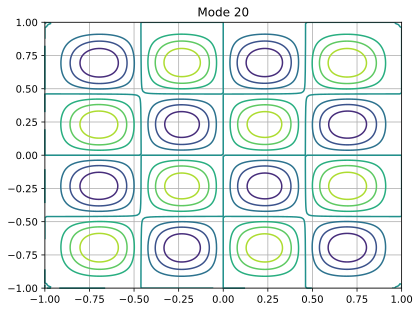

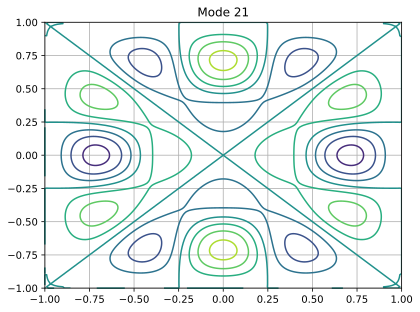

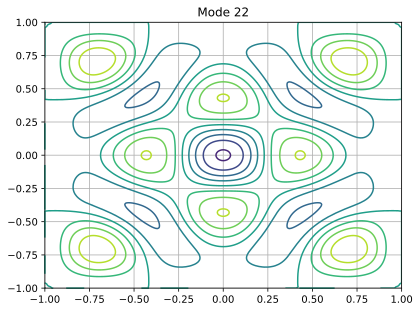

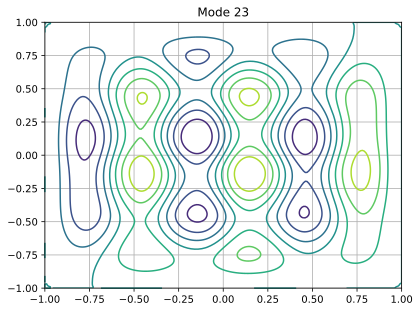

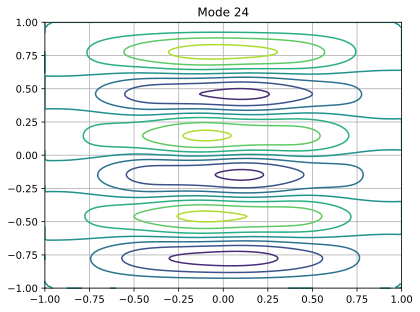

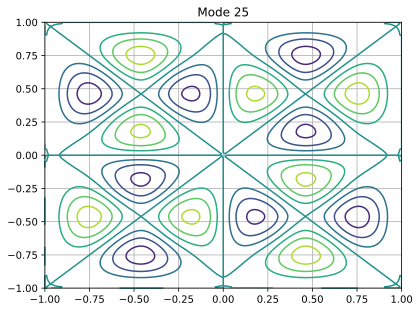

In [96]:
from numpy import * 
from scipy import * 
from scipy import interpolate
from scipy import linalg
#from matplotlib.pyplot import *
from matplotlib import pyplot as plt

# eigenmodes of biharmonic on a square with clamped BCs

# Construct spectral approximation to biharmonic operator:
N = 17 
D,x = cheb(N)
c = 0
c = append(c, 1.0/( 1 - x[1:N]**2 ) )
c = append( c , 0 )
S = diag( c )
D2 = matmul(D ,D )
D3 = matmul(D2,D )
D4 = matmul(D2,D2)
C1 = diag( 1.0 - x**2 )
C2 = diag( x )
M = matmul(C1,D4) - matmul(8*C2,D3) - 12*D2
D4 = matmul(M,S)
Dii = D2[1:N,1:N]
Div = D4[1:N,1:N]

#  D4 = (diag(1-x.^2)*D^4 - 8*diag(x)*D^3 - 12*D^2)*S;
#  D4 = D4(2:N,2:N); 
I = eye(N-1)
L = kron(I,Div) + kron(Div,I) + 2.0*matmul( kron(Dii,I) , kron(I,Dii) )

# Find and plot 25 eigenmodes:
Lam,V = linalg.eig(-L) 
rLam = -real( Lam )
ii = argsort( rLam )
rLam = rLam[ii]; rLam = sqrt( rLam/rLam[0] )
V = V[:,ii]
xx,yy = meshgrid(x,x)
x2 = arange(-1,1.01,0.01)
xxx,yyy = meshgrid(x2,x2)
for i in range(25):
    uu = zeros((N+1,N+1))
    uu[1:N,1:N] = reshape(real(V[:,i]),(N-1,N-1))
    figure(i+1)
    plt.title('Mode '+ str(i+1))
    interpolator = interpolate.interp2d(x,x,uu,'cubic') 
    uuu = interpolator(x2,x2)
    contour(x2,x2,uuu)
    grid(True)
show()


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Nodal lines of the first 25 eigenmodes (with multiplicity) of a clamped square plate. As in Output 28b, there are a number of degenerate pairs of eigenmodes: six of them, so that only 19 distinct eigenvalues are represented. In each degenerate pair, the eigenmodes depicted are arbitrary, and not even orthogonal, which explains why these particular modes are neither symmetrical nor familiar.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 40 : eigenvalues of Orr-Sommerfeld operator


</font>
</div>

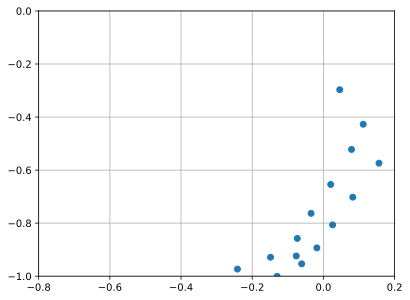

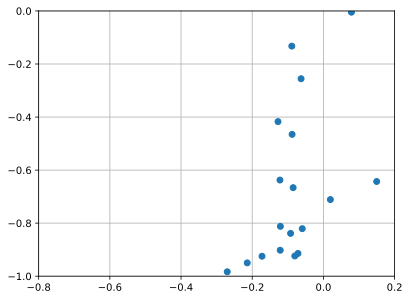

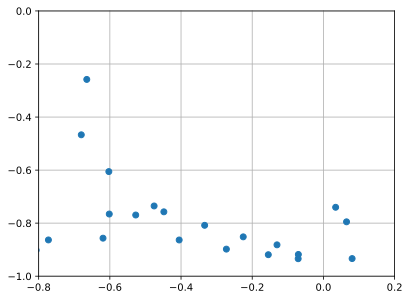

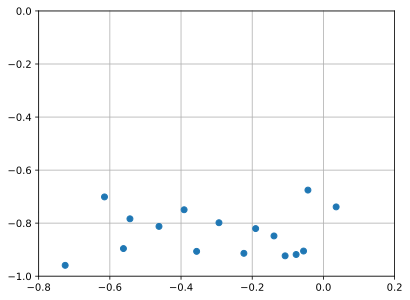

In [77]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# eigenvalues of Orr-Sommerfeld operator

R = 5772
j = 0
for N in arange(40,120,20): # 2nd- and 4th-order differentiation matrices:
    D,x = cheb(N)
    D2 = matmul(D ,D)
    D3 = matmul(D2,D)
    D4 = matmul(D3,D)
    Dii = D2[1:N,1:N]
    c = 0
    c = append( c, 1.0/( 1.0 - x[1:N]**2) )
    c = append( c, 0 )
    S = diag( c )
    M = matmul( diag(1 - x++2), D4 ) - 8*matmul( diag(x), D3 ) - 12*D2
    D4 = matmul(M,S)
    Div = D4[1:N,1:N]
    # Orr-Sommerfeld operators A,B and generalized eigenvalues:
    I = eye(N-1)
    A = ( Div - 2*Dii + I )/R - 2*1j*I - 1j*matmul( diag( 1 - x[1:N]**2 ), ( Dii - I ) )
    B = Dii - I
    ee,L = linalg.eig(A,B)
    j = j + 1
    figure(j)
    plot(real(ee),imag(ee),'o')
    xlim(-.8,.2)
    ylim(-1, 0)
    grid(True)
show()




















<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: The plotted data do not match the text's. A reproduction with fidelity is achievable by using the function cheb and Program 40, both as transcribed by CPraveen, in Octave.

Below: The cheb function and the Matlab program. 


</font>
</div>

In [ ]:
function [D,x] = cheb(N)
  if N==0, D=0; x=1; return, end
  x = cos(pi*(0:N)/N)'; 
  c = [2; ones(N-1,1); 2].*(-1).^(0:N)';
  X = repmat(x,1,N+1);
  dX = X-X';                  
  D  = (c*(1./c)')./(dX+(eye(N+1)));      % off-diagonal entries
  D  = D - diag(sum(D'));                 % diagonal entries
                    
                    

In [ ]:
% p40.m - eigenvalues of Orr-Sommerfeld operator (compare p38.m)

  R = 5772; clf, [ay,ax] = meshgrid([.56 .04],[.1 .5]);
  for N = 40:20:100

    % 2nd- and 4th-order differentiation matrices:
    [D,x] = cheb(N); D2 = D^2; D2 = D2(2:N,2:N);
    S = diag([0; 1 ./(1-x(2:N).^2); 0]);
    D4 = (diag(1-x.^2)*D^4 - 8*diag(x)*D^3 - 12*D^2)*S;
    D4 = D4(2:N,2:N);

    % Orr-Sommerfeld operators A,B and generalized eigenvalues:
    I = eye(N-1);
    A = (D4-2*D2+I)/R - 2i*I - 1i*diag(1-x(2:N).^2)*(D2-I);
    B = D2-I;
    ee = eig(A,B);
    i = N/20-1; subplot('position',[ax(i) ay(i) .38 .38])
    plot(ee,'.','markersize',12)
    grid on, axis([-.8 .2 -1 0]), axis square
    title(['N = ' int2str(N) '    \lambda_{max} = ' ...
        num2str(max(real(ee)),'%16.12f')]), drawnow
  end



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Below is the set of four plots as produced by Octave. They agree well with the text of Trefethen.


</font>
</div>